In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import localcider
import Bio
import Bio.Seq


# Analyzing the IDRs of MED12 and MED12L

- Importing the sequences
- Identify the IDRs
- Apply localcider to compare features

In [3]:
from Bio import SeqIO

with open("data/MED12-Q93074.fasta.txt") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        MED12seq = record.seq


with open("data/MED12L-Q86YW9.fasta.txt") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        MED12Lseq = record.seq

In [4]:
from localcider.sequenceParameters import SequenceParameters

MED12object=SequenceParameters(str(MED12seq))
MED12Lobject=SequenceParameters(str(MED12Lseq))

In [5]:
def localciderrun(seq):
    object = SequenceParameters(seq)
    print("Kappa: ", object.get_kappa())
    print("Fraction Negative: ", object.get_fraction_negative())
    print("Fraction Positive:", object.get_fraction_positive())
    print("Fraction disorder promoting: ", object.get_fraction_disorder_promoting())

In [6]:
MED12object.get_kappa(), MED12Lobject.get_kappa()

(0.18412035991206102, 0.17996043091718392)

In [7]:
MED12object.get_kappa_after_phosphorylation(), MED12Lobject.get_kappa_after_phosphorylation()

(0.18412035991206102, 0.17996043091718392)

In [8]:
MED12object.get_delta(), MED12Lobject.get_delta()

(0.037404135561596774, 0.03568285649783272)

### compiling Metapredict

In [9]:
med12metapred = pd.read_csv("data/MED12_metapredict.csv")
med12Lmetapred = pd.read_csv("data/MED12L_metapredict.csv")

In [10]:
np.mean(med12metapred[" Disorder"]), np.mean(med12Lmetapred[" Disorder"])

(0.44042765273311896, 0.3960107226107226)

In [11]:
med12metapred["Protein"] = "MED12"
med12Lmetapred["Protein"] = "MED12L"

med12metapredcombined = pd.concat([med12metapred, med12Lmetapred])
med12metapredcombined.head()

,Res,Index,Disorder,ppLDDT,Protein
0,M,1,0.900,29.799,MED12
1,A,2,0.940,33.971,MED12
2,A,3,0.930,35.049,MED12
3,F,4,0.930,34.347,MED12
4,G,5,0.948,36.077,MED12


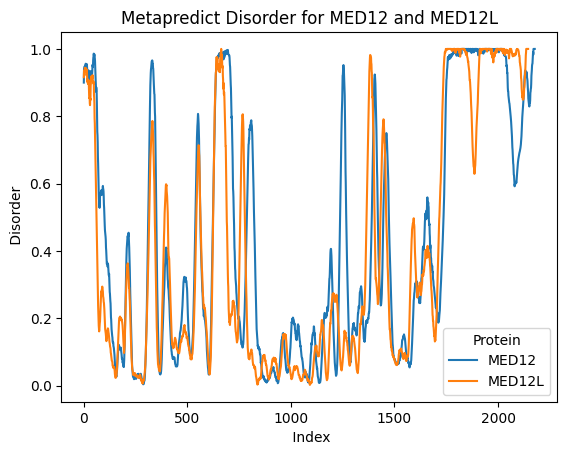

In [12]:
sns.lineplot(data=med12metapredcombined, x = " Index", y = " Disorder", hue = "Protein")
plt.title("Metapredict Disorder for MED12 and MED12L")
plt.savefig("figures/metapredictdisorder.png")


In [13]:
IDRs = pd.DataFrame({"Protein": [],
                     "start": [],
                     "end": [],
                     "Sequence": []})

MED12_IDRs = IDRs.copy()
MED12L_IDRs = IDRs.copy()

def splitcoords(str):
    lst = str.split("_")
    return int(lst[1]), int(lst[2])

i = 0
with open("data/MED12_IDRS.fasta") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        start, end = splitcoords(record.id)
        IDRs.loc[i] = ["MED12", start, end, str(record.seq)]
        MED12_IDRs.loc[i] = ["MED12", start, end, str(record.seq)]
        i += 1

with open("data/MED12L_IDRS.fasta") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        start, end = splitcoords(record.id)
        IDRs.loc[i] = ["MED12L", start, end, str(record.seq)]
        MED12L_IDRs.loc[i] = ["MED12L", start, end, str(record.seq)]
        i += 1



In [14]:
MED12_IDRs

,Protein,start,end,Sequence
0,MED12,1,101,MAAFGILSYEHRPLKRPRLGPPDVYPQDPKQKEDELTALNVKQGFN...
1,MED12,312,350,VSSHSSHVISAQSTSTLPTTPAPQPPTSSTPSTPFSDLL
2,MED12,540,563,RCGESEAADEKGSIASGSLSAPSA
3,MED12,625,724,AFGAPGPRPPSPFDDPADDPEHKEAEGSSSSKLEDPGLSESMDIDP...
4,MED12,788,822,AETDQLAPIVPLNPGDLTFLGGEDGQKRRRNRPEA
5,MED12,1238,1267,SGFTVTGGTEELPEEEGGGGSGGRRQGGRN
6,MED12,1391,1473,QQSAETGSSSGSTASNMPSSSKTKPVLSSLERSGVWLVAPLIAKLP...
7,MED12,1651,1666,CEPQGSLIDTKGNKIA
8,MED12,1737,2177,YYLEPLPLPPEDEEPPAPTLLEPEKKAPEPPKTDKPGAAPPSTEER...


Manually mapping IDRs to each other

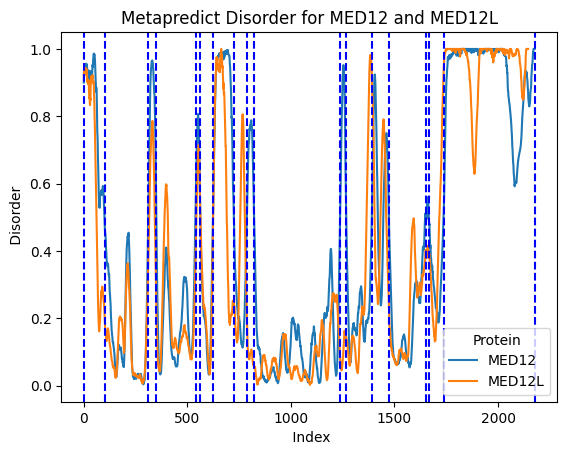

In [15]:
sns.lineplot(data=med12metapredcombined, x = " Index", y = " Disorder", hue = "Protein")
plt.title("Metapredict Disorder for MED12 and MED12L")

for i in range(len(MED12_IDRs)):
    start = MED12_IDRs.iloc[i]["start"]
    end = MED12_IDRs.iloc[i]["end"]
    plt.axvline(x=start, color='blue', linestyle='--')
    plt.axvline(x=end, color='blue', linestyle='--')



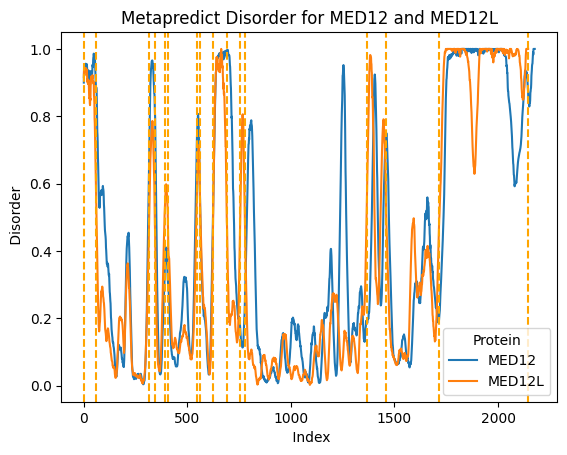

In [16]:
sns.lineplot(data=med12metapredcombined, x = " Index", y = " Disorder", hue = "Protein")
plt.title("Metapredict Disorder for MED12 and MED12L")

for i in range(len(MED12L_IDRs)):
    start = MED12L_IDRs.iloc[i]["start"]
    end = MED12L_IDRs.iloc[i]["end"]
    plt.axvline(x=start, color='orange', linestyle='--')
    plt.axvline(x=end, color='orange', linestyle='--')

In [17]:
manualpairing = {1:1, 2:2, 3: [4, 5], 4:6, 6:7, 9:8}

MED12_groups = [1, 2, 3, 4, 5, np.nan, 6, np.nan, 7]
MED12L_groups = [1, 2, np.nan, 3, 4, 5, 6, 7]

MED12_IDRs["group"] = MED12_groups
MED12L_IDRs["group"] = MED12L_groups

MED12_IDRs.loc[len(MED12_IDRs)] = ["MED12", 1, len(MED12seq), str(MED12seq), "Whole Sequence"]
MED12L_IDRs.loc[len(MED12L_IDRs)] = ["MED12L", 1, len(MED12Lseq), str(MED12Lseq), "Whole Sequence"]

In [18]:
MED12_IDRs

,Protein,start,end,Sequence,group
0,MED12,1,101,MAAFGILSYEHRPLKRPRLGPPDVYPQDPKQKEDELTALNVKQGFN...,1.0
1,MED12,312,350,VSSHSSHVISAQSTSTLPTTPAPQPPTSSTPSTPFSDLL,2.0
2,MED12,540,563,RCGESEAADEKGSIASGSLSAPSA,3.0
3,MED12,625,724,AFGAPGPRPPSPFDDPADDPEHKEAEGSSSSKLEDPGLSESMDIDP...,4.0
4,MED12,788,822,AETDQLAPIVPLNPGDLTFLGGEDGQKRRRNRPEA,5.0
5,MED12,1238,1267,SGFTVTGGTEELPEEEGGGGSGGRRQGGRN,NaN
6,MED12,1391,1473,QQSAETGSSSGSTASNMPSSSKTKPVLSSLERSGVWLVAPLIAKLP...,6.0
7,MED12,1651,1666,CEPQGSLIDTKGNKIA,NaN
8,MED12,1737,2177,YYLEPLPLPPEDEEPPAPTLLEPEKKAPEPPKTDKPGAAPPSTEER...,7.0
9,MED12,1,2177,MAAFGILSYEHRPLKRPRLGPPDVYPQDPKQKEDELTALNVKQGFN...,Whole Sequence


In [19]:
MED12L_IDRs

,Protein,start,end,Sequence,group
9,MED12L,1,61,MAAFGLLSYEQRPLKRPRLGPPDVYPQDPKQKEDELTAVNVKQGFN...,1.0
10,MED12L,317,343,SPHMMIGPNNSSIGAPSPGPPGPGMSP,2.0
11,MED12L,391,405,ANPGSPLDLLQVAPS,NaN
12,MED12L,545,564,GESEVLDEKESISSSSLAGS,3.0
13,MED12L,626,691,DLSVTASTRPRSPVGENADEHYSKDHDVKMEIFSPMPGESCENANT...,4.0
14,MED12L,756,778,NKKSTTETGVGDEGQKARKNKQE,5.0
15,MED12L,1366,1461,QSADLNNSSNSGMSLFNPNSIGSADTSSTRQNGIKTFLSSSERRGV...,6.0
16,MED12L,1717,2145,MPKPRSYYLQPLPLPPEEEEEEPTSPVSQEPERKSAELSDQGKTTT...,7.0
8,MED12L,1,2145,MAAFGLLSYEQRPLKRPRLGPPDVYPQDPKQKEDELTAVNVKQGFN...,Whole Sequence


In [20]:
from Bio import Align
from Bio.Align import substitution_matrices
aligner = Align.PairwiseAligner()
aligner.substitution_matrix = substitution_matrices.load("BLOSUM62")

In [21]:
grouped_seqs = pd.concat([MED12_IDRs, MED12L_IDRs]).groupby("group").agg(list)[["Sequence"]]

alignmentscores = []
for seqlist in grouped_seqs["Sequence"]:
    if len(seqlist) == 2:
        alignmentscore = aligner.score(seqlist[0], seqlist[1])
        normalizinglength = np.mean([len(seqlist[0]), len(seqlist[1])])
        alignmentscores.append(alignmentscore/normalizinglength)
    else:
        alignmentscores.append(np.NaN)

grouped_seqs["Alignment Score"] = alignmentscores

In [22]:
grouped_seqs["MED12 IDR length"] = [len(x[0]) for x in grouped_seqs["Sequence"]]
grouped_seqs["MED12L IDR length"] = [len(x[1]) for x in grouped_seqs["Sequence"]]
grouped_seqs

,Sequence,Alignment Score,MED12 IDR length,MED12L IDR length
group,,,,
1.0,[MAAFGILSYEHRPLKRPRLGPPDVYPQDPKQKEDELTALNVKQGF...,3.790123,101,61
2.0,"[VSSHSSHVISAQSTSTLPTTPAPQPPTSSTPSTPFSDLL, SPHM...",2.272727,39,27
3.0,"[RCGESEAADEKGSIASGSLSAPSA, GESEVLDEKESISSSSLAGS]",2.954545,24,20
4.0,[AFGAPGPRPPSPFDDPADDPEHKEAEGSSSSKLEDPGLSESMDID...,2.240964,100,66
5.0,"[AETDQLAPIVPLNPGDLTFLGGEDGQKRRRNRPEA, NKKSTTET...",2.344828,35,23
6.0,[QQSAETGSSSGSTASNMPSSSKTKPVLSSLERSGVWLVAPLIAKL...,3.709497,83,96
7.0,[YYLEPLPLPPEDEEPPAPTLLEPEKKAPEPPKTDKPGAAPPSTEE...,2.781609,441,429
Whole Sequence,[MAAFGILSYEHRPLKRPRLGPPDVYPQDPKQKEDELTALNVKQGF...,3.645997,2177,2145


In [23]:
MED12L_IDRs[MED12L_IDRs["group"] == 7]["Sequence"].values

array(['MPKPRSYYLQPLPLPPEEEEEEPTSPVSQEPERKSAELSDQGKTTTDEEKKTKGRKRKTKSSSRVDEYPQSNIYRVPPNYSPISSQMMHHPQSTLWGYNLVGQPQQPGFFLQNQSLTPGGSRLDPAGSFVPTNTKQALSNMLQRRSGAMMQPPSLHAITSQQQLIQMKLLQQQQQQRLLRQAQTRPFQQGQPGDQAALFAAQARPSPQLPQYPGLQQAQTMPQGYTMYGTQMPLQQTSQQQAGSVVLSPSYNSRAYPAAHSNPVLMERLRQIQQQPSGYVQQQASPYLQPLTGSQRLNHQALQQSPLVGGGIDAVLTSAHPNLPSVPLPQDPMRPRQPQVRQQQRLLQMQQPQQPQPQQPPQPQQSSQSQSQTLGLQAMQPQQPLFPRQGLQQTQQQQQTAALVRQLQKQLSSNQPQQGVTPYGHPSHF'],
      dtype=object)

In [24]:
grouped_seqs[["MED12 IDR length", "MED12L IDR length", "Alignment Score"]]

,MED12 IDR length,MED12L IDR length,Alignment Score
group,,,
1.0,101,61,3.790123
2.0,39,27,2.272727
3.0,24,20,2.954545
4.0,100,66,2.240964
5.0,35,23,2.344828
6.0,83,96,3.709497
7.0,441,429,2.781609
Whole Sequence,2177,2145,3.645997


In [25]:
#Compare scores to random sequences

amino_acids = list("ACDEFGHIKLMNPQRSTVWY")
num_scores = 10000

randomscores = []

for _ in range(num_scores):
    seq1 = ''.join(np.random.choice(amino_acids, np.random.randint(50, 100)))
    seq2 = ''.join(np.random.choice(amino_acids, np.random.randint(50, 100)))
    alignmentscore = aligner.score(seq1, seq2)
    normalizinglength = np.mean([len(seq1), len(seq2)])
    randomscores.append(alignmentscore/normalizinglength)


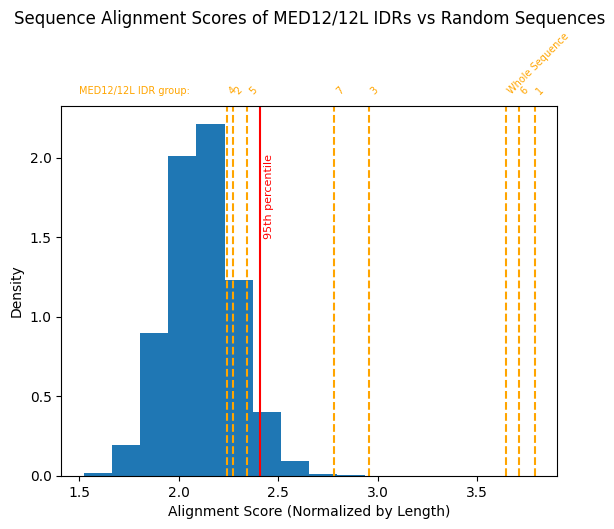

In [26]:
y_val = 2.4

plt.hist(randomscores, density=True)
plt.axvline(x=np.percentile(randomscores, 95), color='red')
plt.text(np.percentile(randomscores, 95) + 0.02,1.5,"95th percentile",rotation=90,fontsize=8, color = "red")

plt.text(1.5,y_val,"MED12/12L IDR group:",rotation=0,fontsize=7, color="orange")


for i in range(len(grouped_seqs)):
    row = grouped_seqs.iloc[i]
    plt.axvline(x=row["Alignment Score"], color='orange', linestyle='--')
    label = grouped_seqs.index.to_list()[i]
    if label != "Whole Sequence":
        label = str(int(label))
    plt.text(row["Alignment Score"],y_val,label,rotation=45,fontsize=7, color="orange")

plt.title("Sequence Alignment Scores of MED12/12L IDRs vs Random Sequences", y = 1.2)
plt.xlabel("Alignment Score (Normalized by Length)")
plt.ylabel("Density")

plt.savefig("figures/alignmentscoresIDR.png", bbox_inches = "tight")


### apply localcider, get features for each IDR seq

In [27]:

def addlocalciderfeaturestodf(df):
    newdf = df.copy()
    newdf["Sequence Object"] = newdf["Sequence"].apply(lambda x:SequenceParameters(x))
    newdf["Kappa"] = newdf["Sequence Object"].apply(lambda x: x.get_kappa())
    newdf["Fraction Negative"] = newdf["Sequence Object"].apply(lambda x: x.get_fraction_negative())
    newdf["Fraction Positive"] = newdf["Sequence Object"].apply(lambda x: x.get_fraction_positive())
    newdf["Fraction Charged"] = newdf["Sequence Object"].apply(lambda x: x.get_FCR(pH=None))
    newdf["Net Charge Per Residue"] = newdf["Sequence Object"].apply(lambda x: x.get_NCPR(pH=None))
    newdf["Isoelectric point"] = newdf["Sequence Object"].apply(lambda x: x.get_isoelectric_point())
    newdf["Fraction disorder promoting"] = newdf["Sequence Object"].apply(lambda x: x.get_fraction_disorder_promoting())
    newdf["Kappa after Phosphorylation"] = newdf["Sequence Object"].apply(lambda x: x.get_kappa_after_phosphorylation())
    newdf["Omega"] = newdf["Sequence Object"].apply(lambda x: x.get_Omega())
    newdf["Mean Net Charge pH=3"] = newdf["Sequence Object"].apply(lambda x: x.get_mean_net_charge(pH=3))
    newdf["Mean Net Charge pH=7"] = newdf["Sequence Object"].apply(lambda x: x.get_mean_net_charge(pH=7))
    newdf["Mean Net Charge pH=11"] = newdf["Sequence Object"].apply(lambda x: x.get_mean_net_charge(pH=11))
    newdf["Mean Hydropathy"] = newdf["Sequence Object"].apply(lambda x: x.get_mean_hydropathy())
    newdf["Uversky Hydropathy"] = newdf["Sequence Object"].apply(lambda x: x.get_uversky_hydropathy())
    newdf["PPII propensity"] = newdf["Sequence Object"].apply(lambda x: x.get_PPII_propensity(mode='hilser'))
    newdf["Delta"] = newdf["Sequence Object"].apply(lambda x: x.get_delta())
    return newdf


In [28]:
MED12_IDRs_stats = addlocalciderfeaturestodf(MED12_IDRs)
MED12L_IDRs_stats = addlocalciderfeaturestodf(MED12L_IDRs)
IDR_stats = pd.concat([MED12_IDRs_stats, MED12L_IDRs_stats])

In [29]:
from matplotlib.colors import Normalize
norm = Normalize(vmin=-80, vmax=80)

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_26054/1491401141.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  IDRstats_percentdiffs = IDR_stats.drop(["start", "end", "Sequence", "Sequence Object"], axis=1).sort_values("Protein").set_index("Protein").groupby("group").agg(lambda x: 100 * abs(x[1] - x[0])/np.mean(x))
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_26054/1491401141.py:1: RuntimeWarning: invalid value encountered in scalar divide
  IDRstats_percentdiffs = IDR_stats.drop(["start", "end", "Sequence", "Sequence Object"], axis=1).sort_values("Protein").set_index("Protein").groupby("group").agg(lambda x: 100 * abs(x[1] - x[0])/np.mean(x))


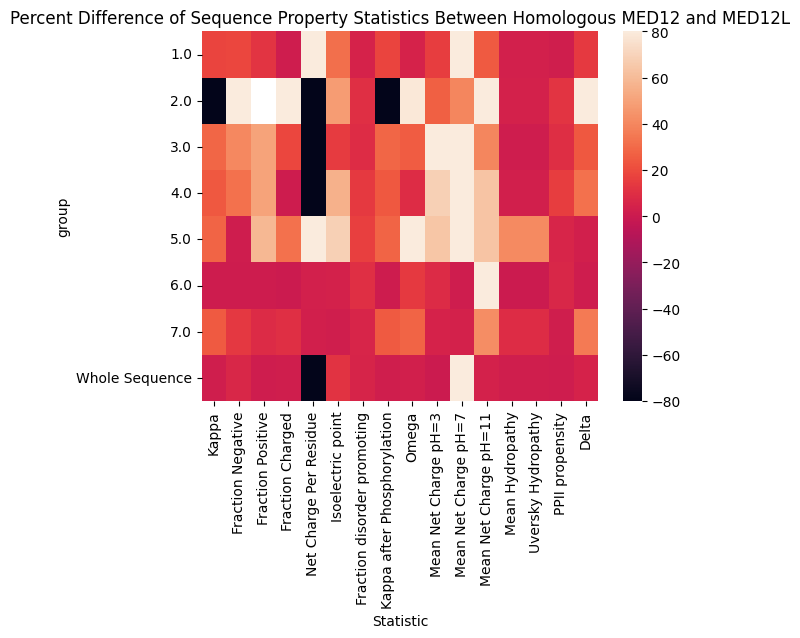

In [30]:
IDRstats_percentdiffs = IDR_stats.drop(["start", "end", "Sequence", "Sequence Object"], axis=1).sort_values("Protein").set_index("Protein").groupby("group").agg(lambda x: 100 * abs(x[1] - x[0])/np.mean(x))
sns.heatmap(IDRstats_percentdiffs, norm = norm, vmin=-800, vmax=800)
plt.title("Percent Difference of Sequence Property Statistics Between Homologous MED12 and MED12L")
plt.xlabel("Statistic")
plt.savefig("figures/percentdifferencepropertiesheatmap.png", bbox_inches = "tight")

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_26054/3843488709.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  IDRstats_percentdiffs = IDR_stats.drop(["start", "end", "Sequence", "Sequence Object"], axis=1)[[x not in (4,2,5) for x in IDR_stats["group"]]].sort_values("Protein").set_index("Protein").groupby("group").agg(lambda x: 100 * abs(x[1] - x[0])/np.mean(x))


Text(0.5, 23.52222222222222, 'Statistic')

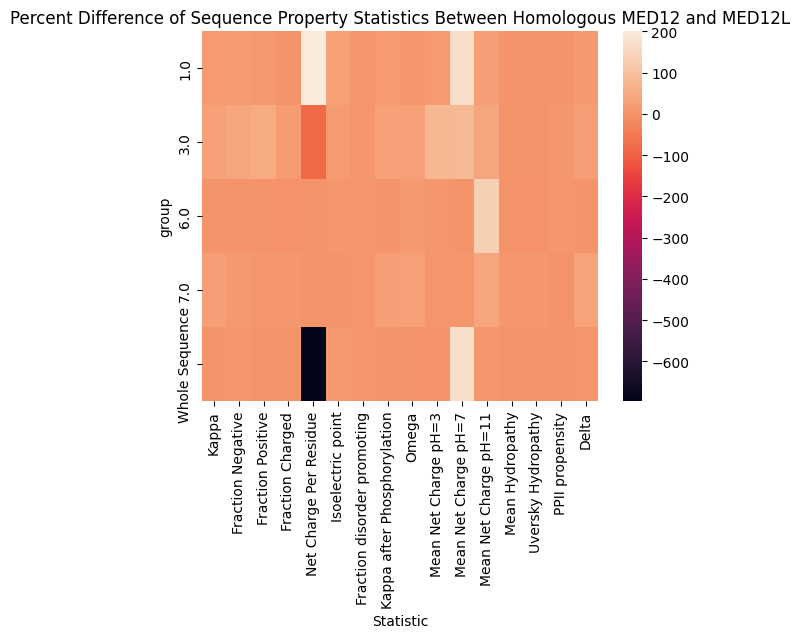

In [31]:
IDRstats_percentdiffs = IDR_stats.drop(["start", "end", "Sequence", "Sequence Object"], axis=1)[[x not in (4,2,5) for x in IDR_stats["group"]]].sort_values("Protein").set_index("Protein").groupby("group").agg(lambda x: 100 * abs(x[1] - x[0])/np.mean(x))
sns.heatmap(IDRstats_percentdiffs)
plt.title("Percent Difference of Sequence Property Statistics Between Homologous MED12 and MED12L")
plt.xlabel("Statistic")

In [32]:
melteddiffs = IDRstats_percentdiffs.melt(ignore_index=False)
melteddiffs = melteddiffs[[abs(x) > 100 for x in melteddiffs["value"]]]
melteddiffs

,variable,value
group,,
1.0,Net Charge Per Residue,200.000000
Whole Sequence,Net Charge Per Residue,-696.041014
1.0,Mean Net Charge pH=7,166.852454
Whole Sequence,Mean Net Charge pH=7,171.836711
6.0,Mean Net Charge pH=11,130.935356


In [33]:
stat_labels = IDR_stats.columns.to_list()[6:]

In [34]:
fractionlabels = ['Fraction Negative', 'Fraction Positive', 'Fraction Charged', 'Net Charge Per Residue', 'Mean Net Charge pH=3',
 'Mean Net Charge pH=7',
 'Mean Net Charge pH=11', "Delta"]

stat_labels_notfrac = [x for x in stat_labels if x not in fractionlabels ]

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Fraction Negative'),
  Text(1, 0, 'Fraction Positive'),
  Text(2, 0, 'Fraction Charged'),
  Text(3, 0, 'Net Charge Per Residue'),
  Text(4, 0, 'Mean Net Charge pH=3'),
  Text(5, 0, 'Mean Net Charge pH=7'),
  Text(6, 0, 'Mean Net Charge pH=11'),
  Text(7, 0, 'Delta')])

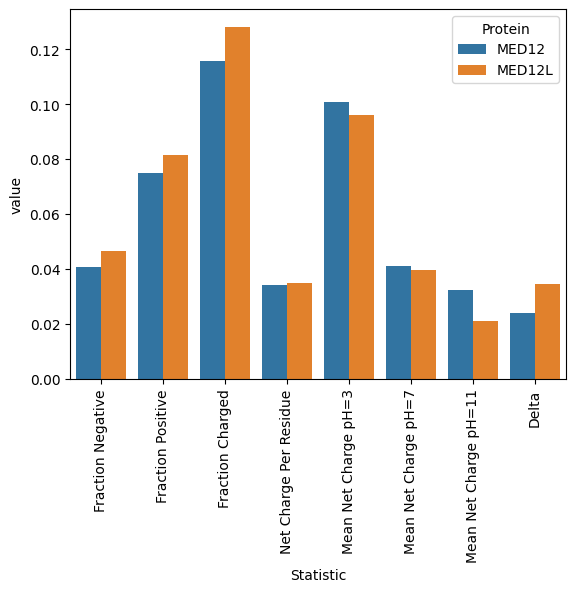

In [35]:
IDRstatgroup7 = IDR_stats[IDR_stats["group"] == 7].set_index("Protein")[fractionlabels].melt(ignore_index=False).rename({"variable": "Statistic"},axis=1)
sns.barplot(IDRstatgroup7, x = "Statistic", y = "value", hue = "Protein")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Fraction Negative'),
  Text(1, 0, 'Fraction Positive'),
  Text(2, 0, 'Fraction Charged'),
  Text(3, 0, 'Net Charge Per Residue'),
  Text(4, 0, 'Mean Net Charge pH=3'),
  Text(5, 0, 'Mean Net Charge pH=7'),
  Text(6, 0, 'Mean Net Charge pH=11'),
  Text(7, 0, 'Delta')])

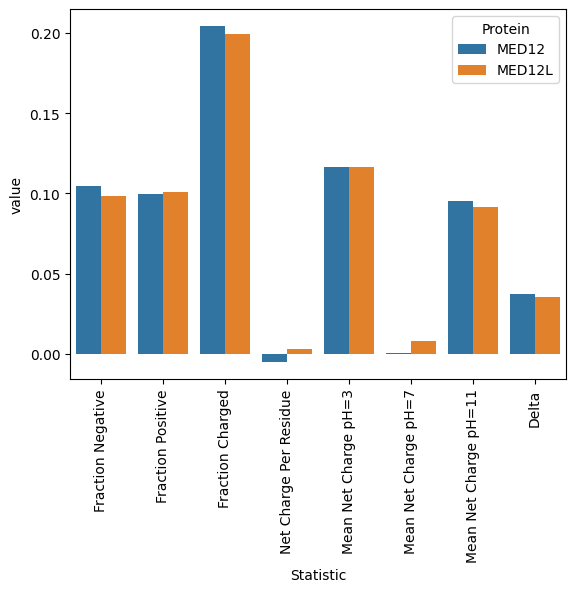

In [36]:
IDRstatgroup7 = IDR_stats[IDR_stats["group"] == "Whole Sequence"].set_index("Protein")[fractionlabels].melt(ignore_index=False).rename({"variable": "Statistic"},axis=1)
sns.barplot(IDRstatgroup7, x = "Statistic", y = "value", hue = "Protein")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Kappa'),
  Text(1, 0, 'Isoelectric point'),
  Text(2, 0, 'Fraction disorder promoting'),
  Text(3, 0, 'Kappa after Phosphorylation'),
  Text(4, 0, 'Omega'),
  Text(5, 0, 'Mean Hydropathy'),
  Text(6, 0, 'Uversky Hydropathy'),
  Text(7, 0, 'PPII propensity')])

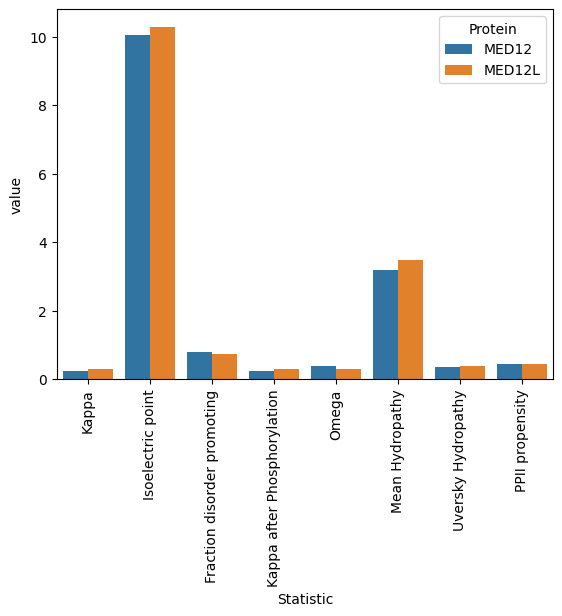

In [37]:
IDRstatgroup7 = IDR_stats[IDR_stats["group"] == 7].set_index("Protein")[stat_labels_notfrac].melt(ignore_index=False).rename({"variable": "Statistic"},axis=1)
sns.barplot(IDRstatgroup7, x = "Statistic", y = "value", hue = "Protein")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Fraction Negative'),
  Text(1, 0, 'Fraction Positive'),
  Text(2, 0, 'Fraction Charged'),
  Text(3, 0, 'Net Charge Per Residue'),
  Text(4, 0, 'Mean Net Charge pH=3'),
  Text(5, 0, 'Mean Net Charge pH=7'),
  Text(6, 0, 'Mean Net Charge pH=11'),
  Text(7, 0, 'Delta')])

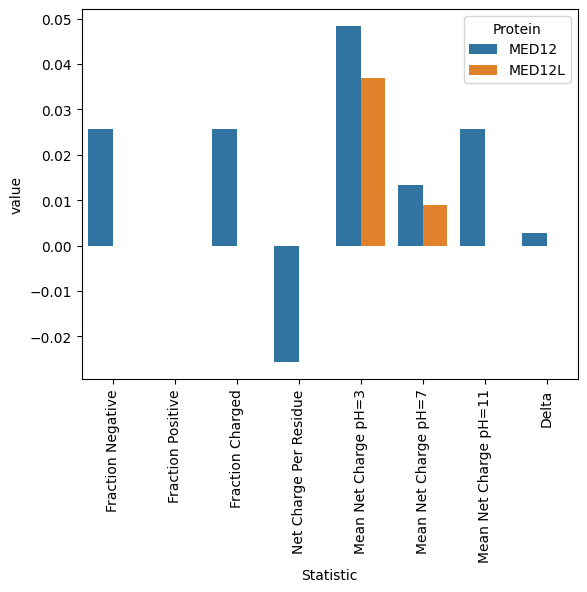

In [38]:
IDRstatgroup2 = IDR_stats[IDR_stats["group"] == 2].set_index("Protein")[fractionlabels].melt(ignore_index=False).rename({"variable": "Statistic"},axis=1)
sns.barplot(IDRstatgroup2, x = "Statistic", y = "value", hue = "Protein")
plt.xticks(rotation=90)


### Sequence composition of IDRs

In [39]:
def add_aafractions(df):
    newdf = df.copy()
    newdf["Sequence Object"] = newdf["Sequence"].apply(lambda x:SequenceParameters(x))
    aa_cols = ['A',
    'C',
    'D',
    'E',
    'F',
    'G',
    'H',
    'I',
    'K',
    'L',
    'M',
    'N',
    'P',
    'Q',
    'R',
    'S',
    'T',
    'V',
    'W',
    'Y']
    aa_fractions_df = pd.DataFrame(columns=aa_cols)
    for row_i in range(len(newdf)):
        seqobject = newdf["Sequence Object"].iloc[row_i]
        aa_frac_newrow = pd.DataFrame([seqobject.get_amino_acid_fractions()], columns=aa_cols)
        aa_fractions_df = pd.concat([aa_fractions_df, aa_frac_newrow], ignore_index=True)

    # Merge the original DataFrame with the calculated amino acid fractions
    compiledf = pd.concat([newdf.reset_index(drop=True), aa_fractions_df.reset_index(drop=True)], axis=1)

    return compiledf

In [40]:
MED12L_IDR_aa_fracs = add_aafractions(MED12L_IDRs)
MED12_IDR_aa_fracs = add_aafractions(MED12_IDRs)

aa_fracs_combined = pd.concat([MED12_IDR_aa_fracs, MED12L_IDR_aa_fracs])

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_26054/1568500806.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aa_fractions_df = pd.concat([aa_fractions_df, aa_frac_newrow], ignore_index=True)
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_26054/1568500806.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aa_fractions_df = pd.concat([aa_fractions_df, aa_frac_newrow], ignore_index=True)


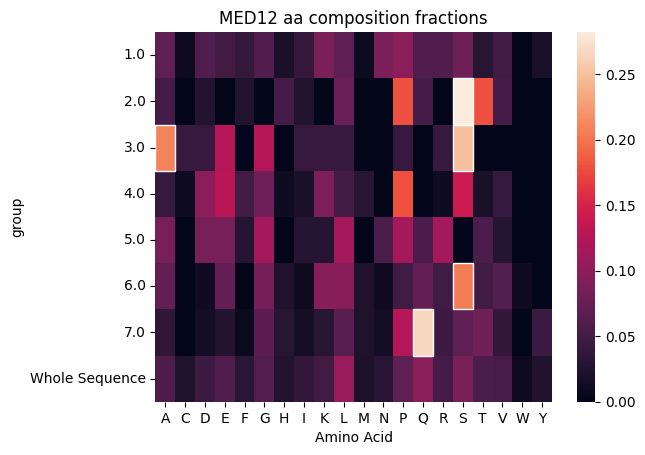

In [49]:
MED12_aaheatmapdf = MED12_IDR_aa_fracs.dropna().set_index("group").drop(["Protein","start", "end", "Sequence", "Sequence Object"], axis=1)

ax = sns.heatmap(MED12_aaheatmapdf)

for y in range(MED12_aaheatmapdf.shape[0]):
    for x in range(MED12_aaheatmapdf.shape[1]):
        if MED12_aaheatmapdf.iloc[y, x] >= 0.2:
            # Draw a rectangle (box) on top of the heatmap
            ax.add_patch(plt.Rectangle((x, y), 1, 1, fill=False, edgecolor='white', lw=1))

plt.title("MED12 aa composition fractions")
plt.xlabel("Amino Acid")
plt.savefig("figures/MED12aacomposition.png")

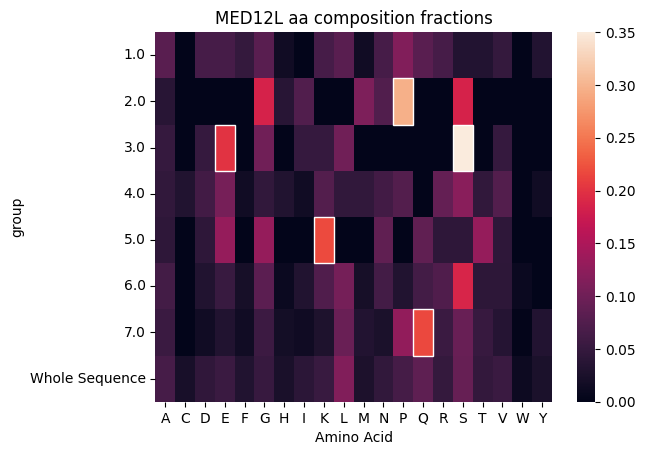

In [48]:
MED12L_aaheatmapdf = MED12L_IDR_aa_fracs.dropna().set_index("group").drop(["Protein","start", "end", "Sequence", "Sequence Object"], axis=1)

ax = sns.heatmap(MED12L_aaheatmapdf)

for y in range(MED12L_aaheatmapdf.shape[0]):
    for x in range(MED12L_aaheatmapdf.shape[1]):
        if MED12L_aaheatmapdf.iloc[y, x] >= 0.2:
            # Draw a rectangle (box) on top of the heatmap
            ax.add_patch(plt.Rectangle((x, y), 1, 1, fill=False, edgecolor='white', lw=1))

plt.title("MED12L aa composition fractions")
plt.xlabel("Amino Acid")
plt.savefig("figures/MED12Laacomposition.png")

In [50]:
import regex as re

In [93]:
#count repeats?
def count_patterns(df):
    newdf = df.copy()

    regexterms = ["[SPQ]{3,}", "[WFYL]{3,}", "[WFYLSPQ]{5,}", "[WFYLSPQ]{7,}", "[WFYLDE]{5,}", "[WFYLDE]{3,}", "QQQ", "SSS", "PPP", "L..LL", "[PQL]{3,}"]

    def get_regex_counts(sequence):
        regexdict = {}
        for regexterm in regexterms:
            regexdict[regexterm] = len(re.findall(regexterm, sequence))
        return regexdict

    motifs_df = pd.DataFrame(columns=regexterms)
    for row_i in range(len(newdf)):
        sequence = newdf["Sequence"].iloc[row_i]
        motifs_newrow = pd.DataFrame([get_regex_counts(sequence)], columns=regexterms)
        motifs_df = pd.concat([motifs_df, motifs_newrow], ignore_index=True)

    # Merge the original DataFrame with the calculated amino acid fractions
    compiledf = pd.concat([newdf.reset_index(drop=True), motifs_df.reset_index(drop=True)], axis=1)

    return compiledf

In [94]:
MED12L_IDR_motifs= count_patterns(MED12L_IDRs)
MED12_IDR_motifs = count_patterns(MED12_IDRs)

motifs_combined = pd.concat([MED12_IDR_motifs, MED12L_IDR_motifs])

In [95]:
MED12L_IDR_motifs

,Protein,start,end,Sequence,group,"[SPQ]{3,}","[WFYL]{3,}","[WFYLSPQ]{5,}","[WFYLSPQ]{7,}","[WFYLDE]{5,}","[WFYLDE]{3,}",QQQ,SSS,PPP,L..LL,"[PQL]{3,}"
0,MED12L,1,61,MAAFGLLSYEQRPLKRPRLGPPDVYPQDPKQKEDELTAVNVKQGFN...,1.0,0,0,0,0,0,1,0,0,0,0,0
1,MED12L,317,343,SPHMMIGPNNSSIGAPSPGPPGPGMSP,2.0,1,0,0,0,0,0,0,0,0,0,0
2,MED12L,391,405,ANPGSPLDLLQVAPS,NaN,0,0,0,0,0,1,0,0,0,0,1
3,MED12L,545,564,GESEVLDEKESISSSSLAGS,3.0,1,0,1,0,0,1,0,1,0,0,0
4,MED12L,626,691,DLSVTASTRPRSPVGENADEHYSKDHDVKMEIFSPMPGESCENANT...,4.0,0,0,0,0,0,0,0,0,0,0,0
5,MED12L,756,778,NKKSTTETGVGDEGQKARKNKQE,5.0,0,0,0,0,0,0,0,0,0,0,0
6,MED12L,1366,1461,QSADLNNSSNSGMSLFNPNSIGSADTSSTRQNGIKTFLSSSERRGV...,6.0,2,0,1,0,0,1,0,2,0,0,0
7,MED12L,1717,2145,MPKPRSYYLQPLPLPPEEEEEEPTSPVSQEPERKSAELSDQGKTTT...,7.0,20,2,13,6,1,5,8,1,0,0,23
8,MED12L,1,2145,MAAFGLLSYEQRPLKRPRLGPPDVYPQDPKQKEDELTAVNVKQGFN...,Whole Sequence,31,12,23,8,4,41,8,6,0,3,39


In [96]:
MED12L_IDR_motifsheatmap = MED12L_IDR_motifs.dropna().set_index("group").drop(["Protein","start", "end", "Sequence"], axis=1).astype(float)
MED12_IDR_motifsheatmap = MED12_IDR_motifs.dropna().set_index("group").drop(["Protein","start", "end", "Sequence"], axis=1).astype(float)

MED12L_IDR_motifsheatmap

,"[SPQ]{3,}","[WFYL]{3,}","[WFYLSPQ]{5,}","[WFYLSPQ]{7,}","[WFYLDE]{5,}","[WFYLDE]{3,}",QQQ,SSS,PPP,L..LL,"[PQL]{3,}"
group,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
7.0,20.0,2.0,13.0,6.0,1.0,5.0,8.0,1.0,0.0,0.0,23.0
Whole Sequence,31.0,12.0,23.0,8.0,4.0,41.0,8.0,6.0,0.0,3.0,39.0


In [97]:
MED12_IDR_motifsheatmap

,"[SPQ]{3,}","[WFYL]{3,}","[WFYLSPQ]{5,}","[WFYLSPQ]{7,}","[WFYLDE]{5,}","[WFYLDE]{3,}",QQQ,SSS,PPP,L..LL,"[PQL]{3,}"
group,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,5.0,0.0,2.0,0.0,0.0,3.0,0.0,2.0,1.0,0.0,1.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
7.0,17.0,1.0,12.0,7.0,0.0,5.0,23.0,1.0,0.0,0.0,17.0
Whole Sequence,30.0,11.0,19.0,9.0,4.0,42.0,23.0,6.0,1.0,2.0,34.0


In [98]:
abs(MED12_IDR_motifsheatmap - MED12L_IDR_motifsheatmap)

,"[SPQ]{3,}","[WFYL]{3,}","[WFYLSPQ]{5,}","[WFYLSPQ]{7,}","[WFYLDE]{5,}","[WFYLDE]{3,}",QQQ,SSS,PPP,L..LL,"[PQL]{3,}"
group,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4.0,5.0,0.0,2.0,0.0,0.0,3.0,0.0,2.0,1.0,0.0,1.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7.0,3.0,1.0,1.0,1.0,1.0,0.0,15.0,0.0,0.0,0.0,6.0
Whole Sequence,1.0,1.0,4.0,1.0,0.0,1.0,15.0,0.0,1.0,1.0,5.0


<Axes: ylabel='group'>

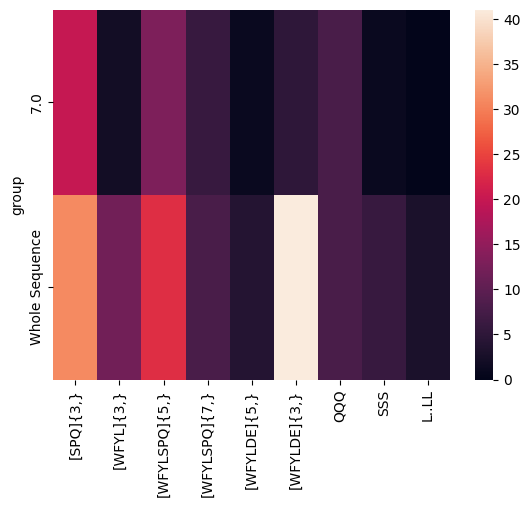

In [66]:
MED12L_IDR_motifsheatmap = MED12L_IDR_motifs.dropna().set_index("group").drop(["Protein","start", "end", "Sequence"], axis=1).astype(float)
MED12L_IDR_motifsheatmap1_6 = MED12L_IDR_motifsheatmap.iloc[6:]
sns.heatmap(MED12L_IDR_motifsheatmap1_6)

In [99]:
#W,F,L,D,E composition across IDRs
"""
aromatic: W (trp),F (phe),Y (tyr)
hydrophobic: ,L
acidic (neg): D (asp), E(glutamic acid)
positive: R,H,K 
"""

'\naromatic: W (trp),F (phe),Y (tyr)\nhydrophobic: ,L\nacidic (neg): D (asp), E(glutamic acid)\npositive: R,H,K \n'

### Tail comparison

In [70]:
IDR1s = pd.concat([IDRs.iloc[0], IDRs.iloc[9]], axis=1).T
IDR1s

,Protein,IDR num,Sequence
0,MED12,IDR_1_101,MAAFGILSYEHRPLKRPRLGPPDVYPQDPKQKEDELTALNVKQGFN...
9,MED12L,IDR_1_61,MAAFGLLSYEQRPLKRPRLGPPDVYPQDPKQKEDELTAVNVKQGFN...


In [ ]:
IDR_tails = pd.concat([IDRs.iloc[8], IDRs.iloc[16]], axis=1).T
MED12_tail_seq = IDR_tails[IDR_tails["Protein"] == "MED12"]["Sequence"].values[0]
MED12L_tail_seq = IDR_tails[IDR_tails["Protein"] == "MED12L"]["Sequence"].values[0]

IDR_tails

,Protein,IDR num,Sequence
8,MED12,IDR_1737_2177,YYLEPLPLPPEDEEPPAPTLLEPEKKAPEPPKTDKPGAAPPSTEER...
16,MED12L,IDR_1717_2145,MPKPRSYYLQPLPLPPEEEEEEPTSPVSQEPERKSAELSDQGKTTT...


In [91]:
MED12_tail_seq

'YYLEPLPLPPEDEEPPAPTLLEPEKKAPEPPKTDKPGAAPPSTEERKKKSTKGKKRSQPATKTEDYGMGPGRSGPYGVTVPPDLLHHPNPGSITHLNYRQGSIGLYTQNQPLPAGGPRVDPYRPVRLPMQKLPTRPTYPGVLPTTMTGVMGLEPSSYKTSVYRQQQPAVPQGQRLRQQLQQSQGMLGQSSVHQMTPSSSYGLQTSQGYTPYVSHVGLQQHTGPAGTMVPPSYSSQPYQSTHPSTNPTLVDPTRHLQQRPSGYVHQQAPTYGHGLTSTQRFSHQTLQQTPMISTMTPMSAQGVQAGVRSTAILPEQQQQQQQQQQQQQQQQQQQQQQQQQQYHIRQQQQQQILRQQQQQQQQQQQQQQQQQQQQQQQQQQHQQQQQQQAAPPQPQPQSQPQFQRQGLQQTQQQQQTAALVRQLQQQLSNTQPQPSTNIFGRY'

In [93]:
MED12L_ALBATROSSresults = pd.read_csv("data/MED12L_albatross.csv")
MED12_ALBATROSSresults = pd.read_csv("data/MED12_albatross.csv")
MED12L_ALBATROSSresults["Protein"] = "MED12L"
MED12_ALBATROSSresults["Protein"] = "MED12"
pd.concat([MED12_ALBATROSSresults, MED12L_ALBATROSSresults])

,Unnamed: 0,sequence,length,radius_of_gyration,end_to_end_distance,scaling_exponent,asphericity,prefactor,Protein
0,0,YYLEPLPLPP\nEDEEPPAPTL\nLEPEKKAPEP\nPKTDKPGAAP...,441,57.260091,130.934312,0.486415,0.357,7.847763,MED12
0,0,MPKPRSYYLQ\nPLPLPPEEEE\nEEPTSPVSQE\nPERKSAELSD...,429,59.579792,144.393178,0.490608,0.369,7.751812,MED12L
